In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Read data From Excel file
data = pd.read_excel("EE627A_HW1_Data.xls", index_col = 0)
#Removed Unnamed column in DataFrame
data.rename({"Unnamed: 6":"a"}, axis="columns", inplace=True)
data.drop(["a"], axis=1, inplace=True)

In [38]:
data.head()

,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192701,-0.10,-0.09,4.72,0.25,0.36,-0.70,0.57,-0.33,2.46,9.67,...,1.88,2.08,-1.45,-2.60,1.44,-17.93,-3.34,1.53,-2.48,-4.13
192702,4.32,0.31,3.40,0.26,-1.67,4.29,12.83,1.58,1.43,1.41,...,3.97,8.90,4.85,5.21,5.20,3.49,4.48,6.81,2.77,0.30
192703,0.33,-1.77,-2.42,0.30,2.97,1.98,-13.56,5.55,0.57,-0.28,...,5.56,-7.80,4.30,-8.39,1.06,-20.47,3.05,-2.44,1.41,2.28
192704,0.42,0.30,1.03,0.25,4.53,2.60,2.85,4.09,-3.34,-0.96,...,-2.08,3.44,3.10,4.43,0.77,-10.75,2.09,6.02,3.76,4.71
192705,5.36,0.67,3.41,0.30,3.41,6.14,11.62,11.87,-0.50,3.13,...,3.35,18.33,5.10,5.66,6.69,-4.01,0.49,4.69,10.25,1.40


In [39]:
#Download the monthly Time-series cosnsisting on 30 Industries 
Industry = data.iloc[:,5:35]

In [40]:
#Monthly Time-series of Market-risk free
Mkt_RF = data.iloc[:,0]

In [41]:
#SMB (Small minus big)
SMB = data.iloc[:,1]

In [42]:
#HML (High minus low)
HML = data.iloc[:,2]

In [43]:
#RF (Riskfreerate)
RF = data.iloc[:,3]

In [44]:
#Momentum
Mom = data.iloc[:,4]

In [45]:
#Correlation Matrix between Industies and Factors time-series
correlation = data.corr().loc['Food':'Other', 'Mkt-RF':'Mom']
correlation

,Mkt-RF,SMB,HML,RF,Mom
Food,0.835924,0.201698,0.215132,0.032222,-0.280289
Beer,0.707673,0.351039,0.214982,-0.011277,-0.200077
Smoke,0.584268,0.103154,0.171809,0.063036,-0.219165
Games,0.830211,0.412089,0.250387,-0.024963,-0.356992
Books,0.830092,0.408145,0.250608,0.009172,-0.306399
Hshld,0.816234,0.261883,0.107373,-0.024209,-0.199683
Clths,0.780630,0.460134,0.246719,-0.020186,-0.360482
Hlth,0.804022,0.208896,0.064393,0.007783,-0.225778
Chems,0.883889,0.208012,0.192392,-0.033856,-0.301203
Txtls,0.823438,0.495356,0.347476,-0.035738,-0.371137


In [46]:
#Mean of Factors
five_factors = data.loc[:,'Mkt-RF':'Mom'] 
expected_value = five_factors.mean()
expected_value

Mkt-RF    0.643439
SMB       0.246593
HML       0.409821
RF        0.304631
Mom       0.764167
dtype: float64

In [47]:
##Correlation Matrix between all the time-series
corr_matrix = data.corr()

In [48]:
# To Find Min and Max Correlation Factor
factor_models = ['Mkt-RF', 'SMB', 'HML', 'RF', 'Mom']
max_factor_model,min_factor_model = [], []
used_columns = []
for i in data.columns:
    if i in factor_models:
        continue 
    used_columns.append(i)
    max_factor,min_factor = None, None
    max_factor_val,min_factor_val = None, None
    for j in factor_models:
        curr_value = corr_matrix[i][j]
        if max_factor is None or curr_value > max_factor_val:
            max_factor_val = curr_value
            max_factor = j
        if min_factor is None or curr_value < min_factor_val:
            min_factor_val = curr_value
            min_factor = j
    max_factor_model.append(max_factor)
    min_factor_model.append(min_factor)
    
factors_data = pd.DataFrame([max_factor_model, min_factor_model], columns = used_columns, index=['positive', 'negative'])
print('max & min correlation factors:', factors_data.to_numpy())

RF_data = corr_matrix['RF'][[i for i in data.columns if i not in factor_models]]

# print(rf_data)
avg_rf_correlation = np.mean(RF_data)
print('average rf correlation:', avg_rf_correlation)

factors_data
        

max & min correlation factors: [['Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF'
  'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF'
  'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF'
  'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF' 'Mkt-RF']
 ['Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom'
  'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom'
  'Mom' 'Mom' 'Mom' 'Mom' 'Mom' 'Mom']]
average rf correlation: -0.01750517678862145


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
positive,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,...,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF,Mkt-RF
negative,Mom,Mom,Mom,Mom,Mom,Mom,Mom,Mom,Mom,Mom,...,Mom,Mom,Mom,Mom,Mom,Mom,Mom,Mom,Mom,Mom


# Part 1 
Q:1 Form the correlation matrix between all these time series. For the four-factor model (market-RF, SMB, HML, and Momentum), which factor correlates most highly with every industry? Which factor correlates negatively with every industry? Does RF (Riskfreerate) correlate highly with 30 industry time series?

Ans:
From the above output,
1. We can see that factor Mkt-RF correlates most highly with every 30 industries.
2. Factor Mom Correlates negatively with every industries.
3. Average RF Correlation of -0.0175051, RF (Riskfreerate) does not correlate highly with 30 industry time series.

In [49]:
# Auto-correlation function(ACF)
autocorr = pd.DataFrame({'Mkt-RF': [], 'SMB': [], 'HML': [],'Mom': []})

In [50]:
for i in range(11):
     autocorr = autocorr.append({'Mkt_RF': Mkt_RF.autocorr(lag=i), 'SMB': SMB.autocorr(lag=i), 'HML': HML.autocorr(lag=i), 'Mom': Mom.autocorr(lag=i)}, ignore_index = True)
autocorr

,Mkt-RF,SMB,HML,Mom,Mkt_RF
0,NaN,1.000000,1.000000,1.000000,1.000000
1,NaN,0.075349,0.178162,0.057802,0.107166
2,NaN,0.059217,-0.013295,-0.077431,-0.016341
3,NaN,-0.054121,-0.031671,-0.074564,-0.108213
4,NaN,-0.031596,-0.080595,-0.049218,0.005644
5,NaN,-0.053830,-0.061507,-0.039034,0.070198
6,NaN,0.009889,0.007804,0.051168,-0.020141
7,NaN,0.022590,0.064685,-0.036288,0.012595
8,NaN,0.026435,-0.002258,-0.015960,0.036768
9,NaN,0.083880,0.115296,0.012261,0.081933


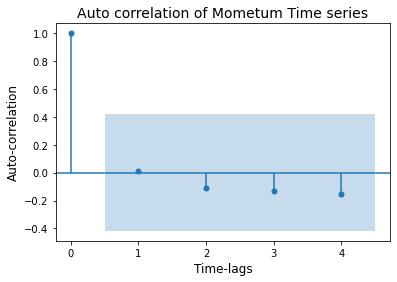

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(autocorr.Mom, lags=4)
plt.xlabel('Time-lags', fontsize=12)
plt.ylabel('Auto-correlation', fontsize=12)
plt.title('Auto correlation of Mometum Time series', fontsize=14)
plt.show()

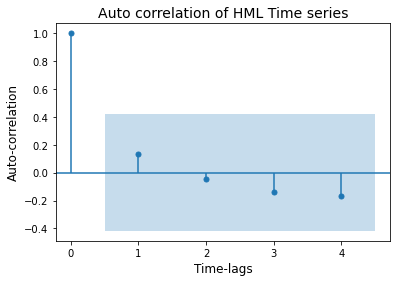

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(autocorr.HML, lags=4)
plt.xlabel('Time-lags', fontsize=12)
plt.ylabel('Auto-correlation', fontsize=12)
plt.title('Auto correlation of HML Time series', fontsize=14)
plt.show()

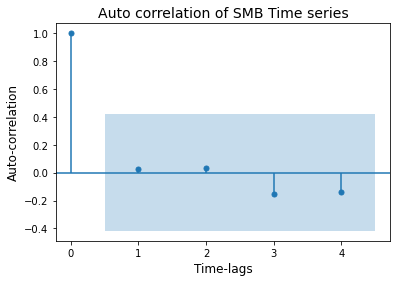

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(autocorr.SMB, lags=4)
plt.xlabel('Time-lags', fontsize=12)
plt.ylabel('Auto-correlation', fontsize=12)
plt.title('Auto correlation of SMB Time series', fontsize=14)
plt.show()

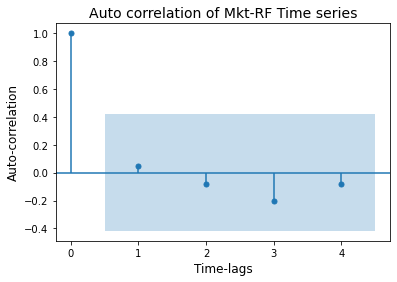

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(autocorr.Mkt_RF , lags=4)
plt.xlabel('Time-lags', fontsize=12)
plt.ylabel('Auto-correlation', fontsize=12)
plt.title('Auto correlation of Mkt-RF Time series', fontsize=14)
plt.show()

Q:2 Form the auto-correlation function (ACF) for time-lag 1 to time-lag 10 with the four-factor time series (market-RF, SMB, HML, and Momentum).  Is there any AR(1) model in the 4 time series? Explain your observations.

Ans:

From the above Auto-correlation function for time-lag with four factor time series, we can observed that Momentum and HML factor to be AR(1) model. Additionally, I can observed that higher the correlation, higher will be the order of ACF. So that, We can consider more observation from the past predict present of the highly correlated features.


# Part 2

Question: Suppose that the daily value of a financial time series follows the model 

Xt  =  0.01 + 0.2 Xt − 2 + at

where {at} is a Gaussian white noise series with mean zero and variance 0.02.  




1. What are the mean and variance of the return series Xt?

Ans: 

For Mean,

E{Xt} = E{0.01 + 0.2 X(t-2) + at}
      = 0.01 +  E{0.2 X(t-2)} + E{at}
      = 0.01 + 0.2 E {X(t-2)} + E{at}

Where, E{at} = 0

so, Stationary => E{Xt} = E{X(t-2)}

Now, E{Xt} = 0.01 + 0.2 E{Xt} + 0

Mean = E{Xt} = 0.0125





For Variance,

µ = E{Xt}

Xt  =  0.01 + 0.2 Xt − 2 + at

(Xt-µ) = 0.2(X(t-2)-µ) + at

E{Xt-µ}^2 = (0.2(X(t-2)-µ)+at)^2 

         = E{0.04 * (Xt-µ)^2} + E{0.4 at *(X(t-2)-µ)} + E{at^2}
          
          
at is noise, independent from Xt-2. Correlation is 0,second term = 0

because, The stationary point, X(t-2)-µ = variance

var = 0.2^2 * var + σ², σ² is the noise level(E{at^2})

variance = σ²/0.96










2. Compute the lag-1 and lag-2 autocorrelations of Xt. 

Ans:

Xt  =  0.01 + 0.2 Xt − 2 + at

remove mean(Xt = Xt-µ)

Xt-µ = 0.01+0.2 Xt-2+ at-µ

Xt-µ = 0.2(X(t-2)-µ)+ at

x̅t = 0.2 x̅(t-2) + at





Auto-correlation:

E {x̅t * x̅(t-L)} = E{(0.2 x̅(t-2) + at) x̅(t-L)}

E {x̅t * x̅(t-L)} = E{0.2 x̅(t-2)* x̅(t-L)}

For lag 1: E{x̅t * x̅(t-1)} = E{0.2 x̅(t-2)* x̅(t-1)}

For lag 2: E{x̅t * x̅(t-2)} = E{0.2 x̅(t-2)* x̅(t-2)}








3. Assume that  X100 = −0.01, and X99 = 0.02. Compute the 1- and 2-step-ahead forecasts of the return series at the forecast origin t = 100. 





ρl = 0.2 ρ(l-2)

ρ101 = 0.2 ρ(99) = 0.2 * 0.02 =0.004 (1-step ahead forecast)

ρ102 = 0.2 ρ(100) = 0.2 * -0.01 = -0.002 (2-step ahead forecast)